<a href="https://colab.research.google.com/github/rpedram/data-science/blob/main/ml_proj_2_hr_suit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Proj 2 HR
Col Rakesh Pedram

In [ ]:
#
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import sklearn.metrics
from imblearn.over_sampling import SMOTE

# Get the file path from Google Drive
file_path = '/content/drive/My Drive/Dataset/hrdata.xlsx'

# Read the file into a Pandas DataFrame
df = pd.read_excel(file_path)
print(df.head())
print(df.info())
# Describe numerical variables to check for missing values, outliers, etc.
print(df.describe())
#df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4         

#Data wrangling

In [ ]:
# Renaming column sales to department
df.rename(columns={'sales': 'Department'}, inplace=True)
# Spelling error in field
df.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)
# Check for missing values
print(df.isnull().sum())

# There are no nulls data is clean
df['Department'].unique()

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
df["Department"] = le.fit_transform(df["Department"])

# Convert the salary to ordinal data
salary_map = {'low': 1, 'medium': 2, 'high': 3}
df['salary'] = df['salary'].map(salary_map)

#Normalisation of data using standard scaler ?
# Scale numerical features using StandardScaler
scaler = StandardScaler()
# Make a numerical column list. Option to exclude. Not sure if to exclude salary which i ordinal
exclude_list=[]
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(exclude_list)

#df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


Heat map for corelation matrix

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_monthly_hours           -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   
Department                       0.003153         0.007772        0.009268   
salary                           0.050022        -0.013002       -0.001803   

                       average_monthly_hours  time_spend_company  \
satisfaction_level                 -0.020048           -0.100866   
last_

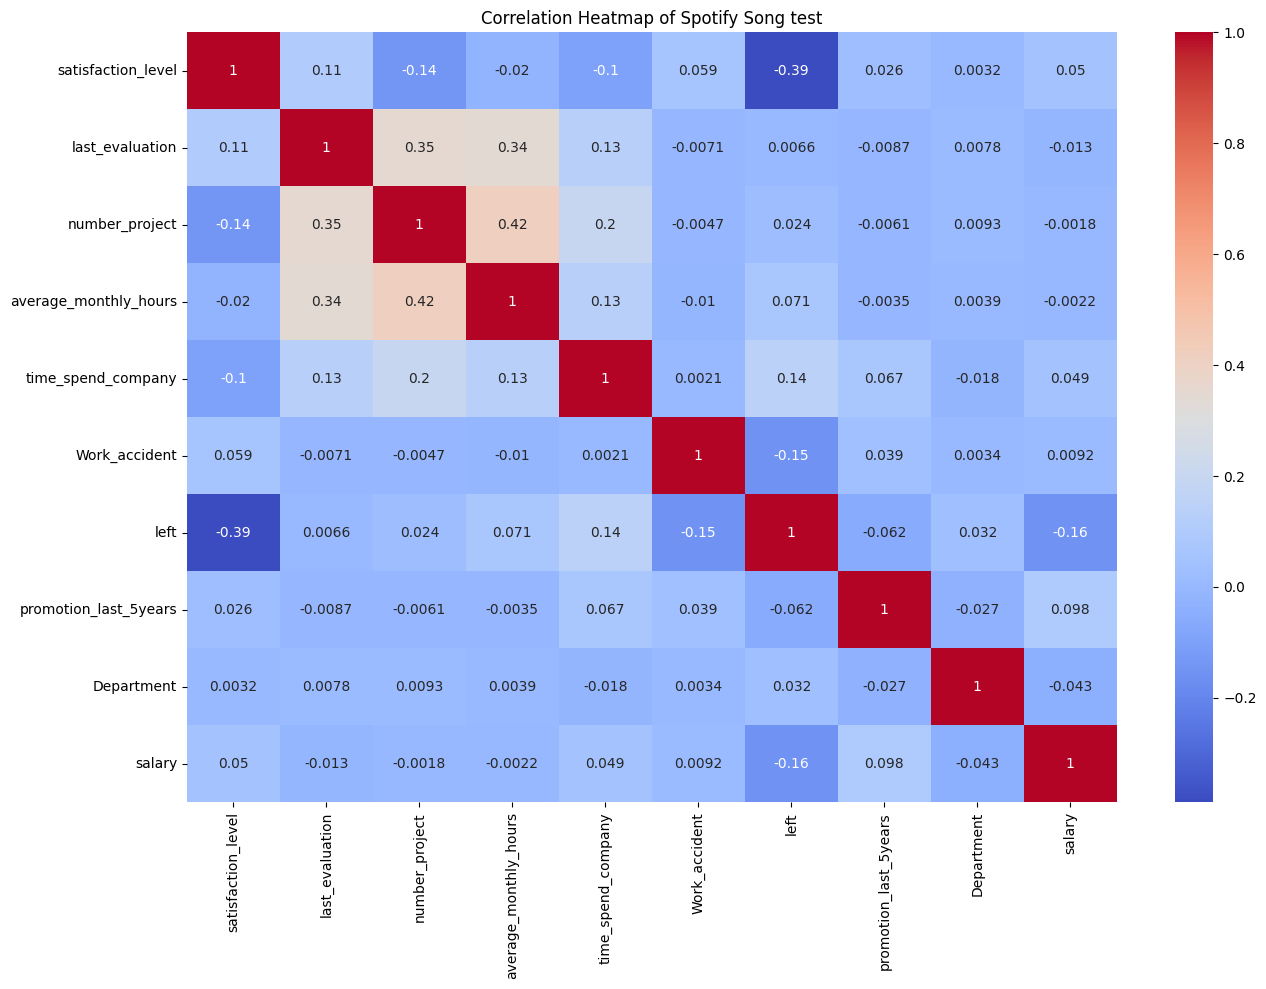

In [ ]:
# Calculate correlation matrix
correlation = df[numerical_columns].corr()
print(correlation)

# Create the heatmap using Seaborn for better control and colorbar
plt.figure(figsize=(15, 10))  # Set the figure size (adjust as needed)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Spotify Song test")
plt.show()

Satisfaction level and time spent in the company contributed most to the churn in manpower.

#Distributions of employee satisfaction, evaluation, and monthly hours

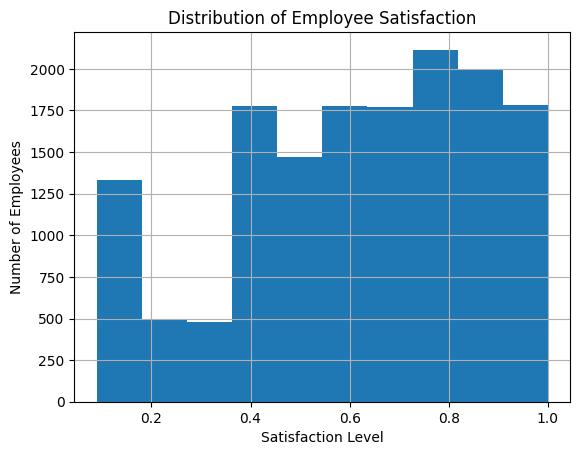

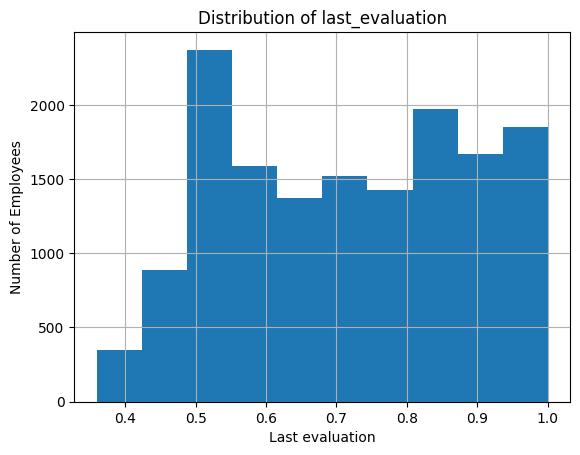

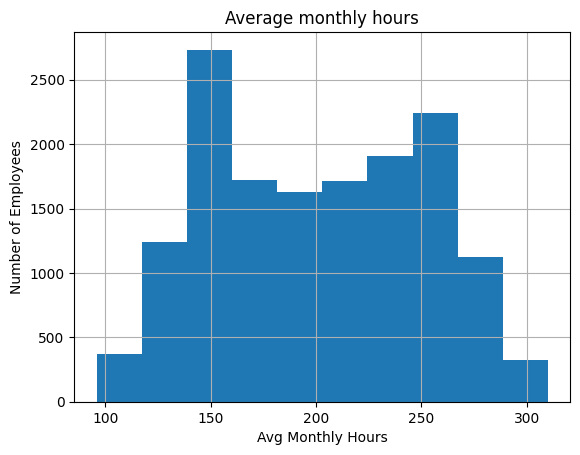

In [ ]:
df["satisfaction_level"].hist()
plt.title("Distribution of Employee Satisfaction")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Employees")
plt.show()

#  plots for last_evaluation and average_montly_hours
df["last_evaluation"].hist()
plt.title("Distribution of last_evaluation")
plt.xlabel("Last evaluation")
plt.ylabel("Number of Employees")
plt.show()
# Plot average_monthly_hours

df["average_monthly_hours"].hist()
plt.title("Average monthly hours")
plt.xlabel("Avg Monthly Hours")
plt.ylabel("Number of Employees")
plt.show()


##Bar plot of employee project count by left status:

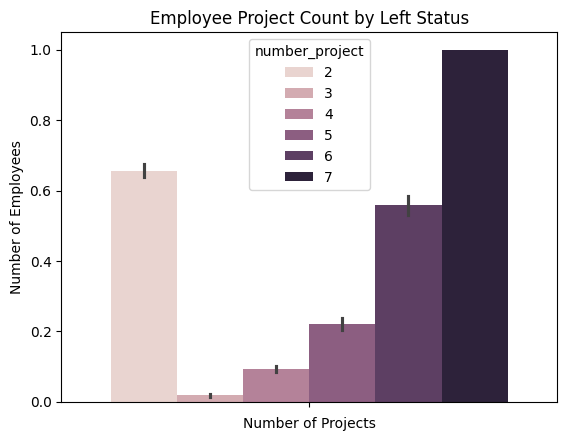

In [ ]:
sns.barplot(y="left", hue="number_project", data=df)
plt.title("Employee Project Count by Left Status")
plt.xlabel("Number of Projects")
plt.ylabel("Number of Employees")
plt.show()


#Clustering of employees who left:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

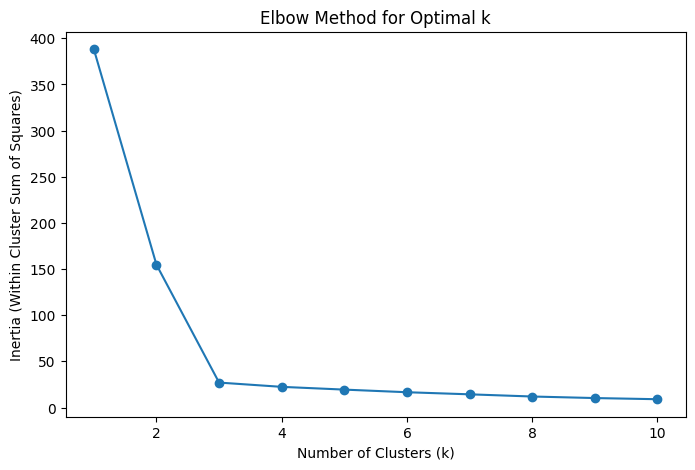

In [ ]:
from sklearn.cluster import KMeans

# Select features and target variable
# Assuming your data is in a DataFrame named 'data'
data_left = df[df['left'] == 1]
features = ['satisfaction_level', 'last_evaluation']  # Adjust as needed
X = data_left[features]
# Elbow Method with KMeans
inertia = []
for k in range(1, 11):  # Trying values from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)  # 'random_state' for reproducibility
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Use the number of clusters determined earlier
kmeans.fit(X)
data_left['cluster'] = kmeans.labels_
#Analyse cluster
data_left.groupby('cluster').describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-66-969b41c84a18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_left['cluster'] = kmeans.labels_


satisfaction_level                                                    \
                     count      mean       std   min   25%   50%   75%   max   
cluster                                                                        
0                   1650.0  0.410145  0.054837  0.10  0.38  0.41  0.44  0.78   
1                    977.0  0.808516  0.075605  0.48  0.76  0.82  0.87  0.92   
2                    944.0  0.111155  0.045088  0.09  0.10  0.10  0.11  0.42   

        last_evaluation            ... Department       salary            \
                  count      mean  ...        75%  max   count      mean   
cluster                            ...                                     
0                1650.0  0.516982  ...        8.0  9.0  1650.0  1.419394   
1                 977.0  0.911709  ...        8.0  9.0   977.0  1.404299   
2                 944.0  0.869301  ...        8.0  9.0   944.0  1.417373   

                                            
              std  min  25%  50%  75%  max  
cluster                                     
0        0.552726  1.0  1.0  1.0  2.0  3.0  
1        0.521369  1.0  1.0  1.0  2.0  3.0  
2        0.526654  1.0  1.0  1.0  2.0  3.0  

[3 rows x 80 columns]

Visualise the clusters

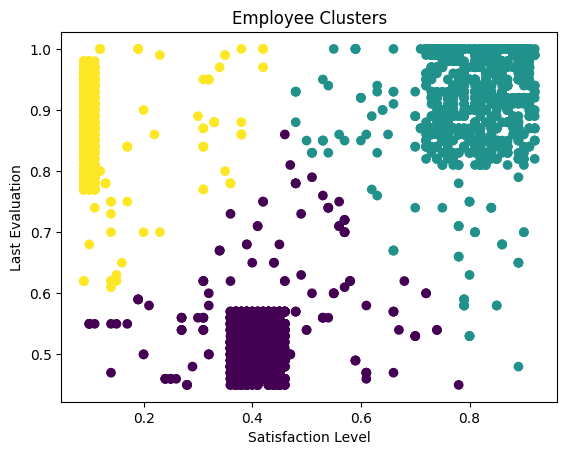

In [ ]:
plt.scatter(data_left['satisfaction_level'], data_left['last_evaluation'], c=data_left['cluster'], cmap='viridis')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Employee Clusters')
plt.show()

#Handling class imbalance with SMOTE:

In [ ]:
# Separate features and target
X = df.drop("left", axis=1)
y = df["left"]

# Stratified train-test split
sss = StratifiedShuffleSplit(test_size=0.2, random_state=123)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


 5-fold cross-validation model training and evaluation:

Logistic Regression:

In [ ]:
model = LogisticRegression()
cv = StratifiedShuffleSplit(n_splits=5, random_state=123)
scores = []
for train_index, test_index in cv.split(X_train_resampled, y_train_resampled):
    X_train_fold, X_test_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
    y_train_fold, y_test_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]
    model


In [ ]:
   model.fit(X_train_fold, y_train_fold)
   y_pred = model.predict(X_test_fold)
   print(classification_report(y_test_fold, y_pred))

# Repeat the  processes for RandomForestClassifier and GradientBoostingClassifier


              precision    recall  f1-score   support

           0       0.83      0.75      0.79       915
           1       0.77      0.85      0.81       914

    accuracy                           0.80      1829
   macro avg       0.80      0.80      0.80      1829
weighted avg       0.80      0.80      0.80      1829



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Visualisation of confusion matrix

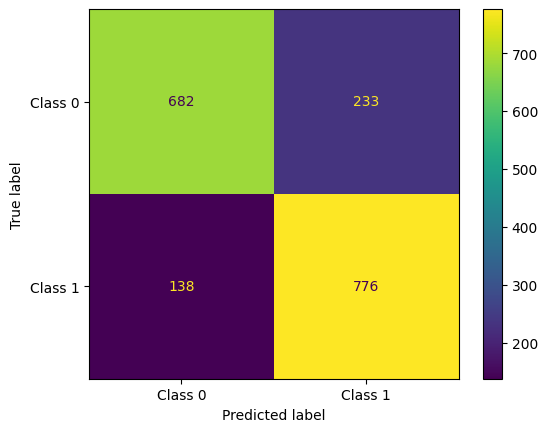

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# As model already trained your classifier (model)
cm = confusion_matrix(y_test_fold, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot()
plt.show()

Random Forest Classifier model

In [ ]:
#Random Classfier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest Classifier with some parameters
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the model to your training data (replace 'X_train' and 'y_train' with your variables)
rfc.fit(X_train, y_train)

# Make predictions on new data
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2286
           1       0.97      0.90      0.94       714

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



Visualisation of the classification report

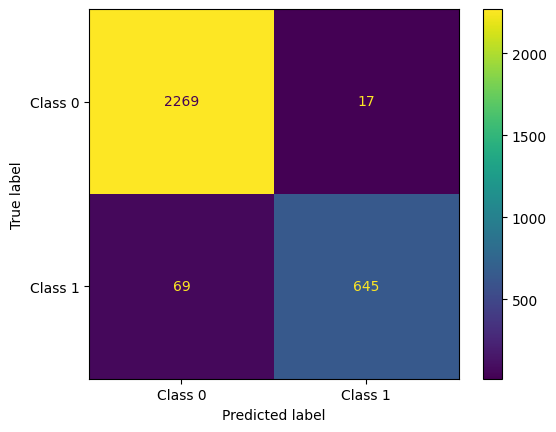

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your classifier (rfc)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot()
plt.show()

Gradient boosting Classfier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

# Fit the model
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.97      0.93      0.95       714

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



Plot confusion matrix

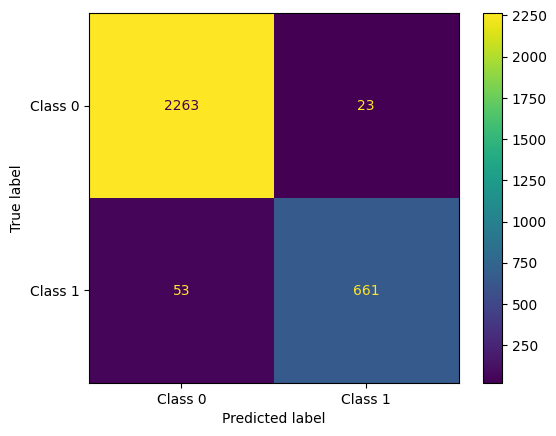

In [ ]:
# Now that i have trained my classifier (rfc)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot()
plt.show()

ROC-AUC Curves:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


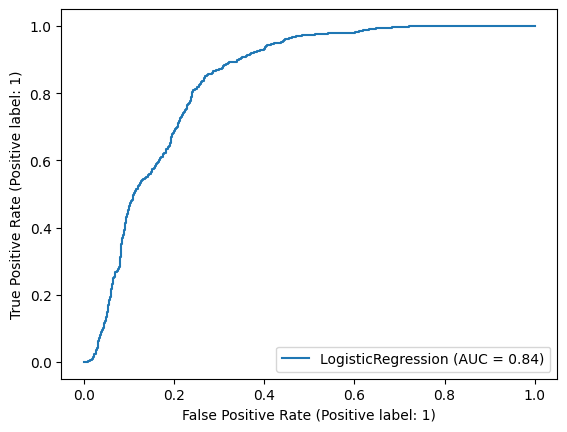

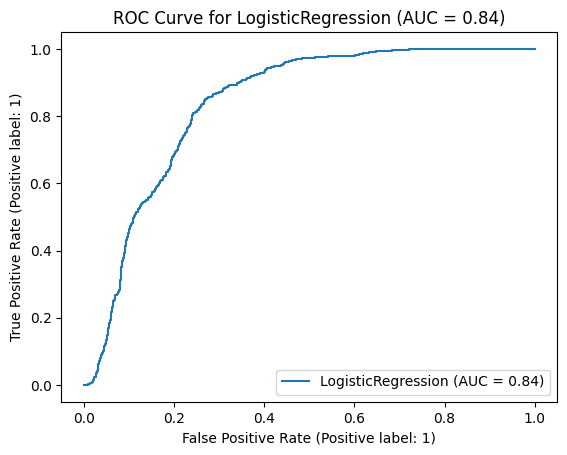

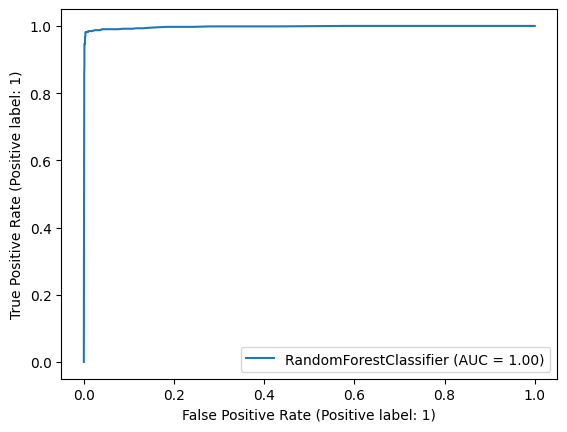

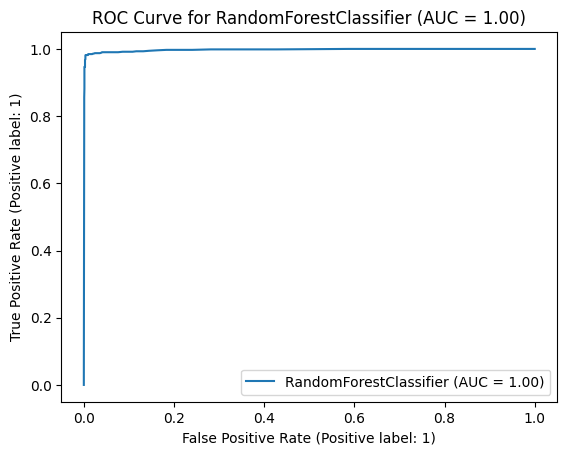

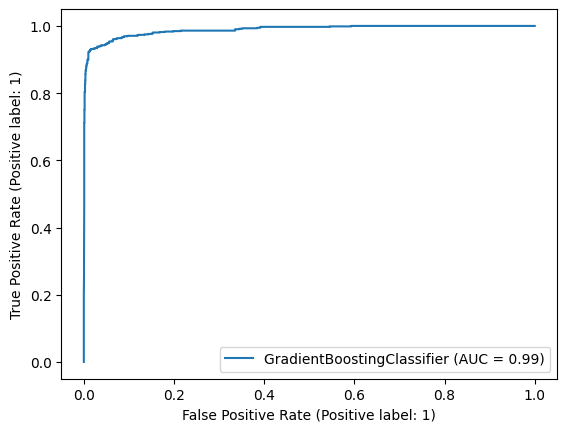

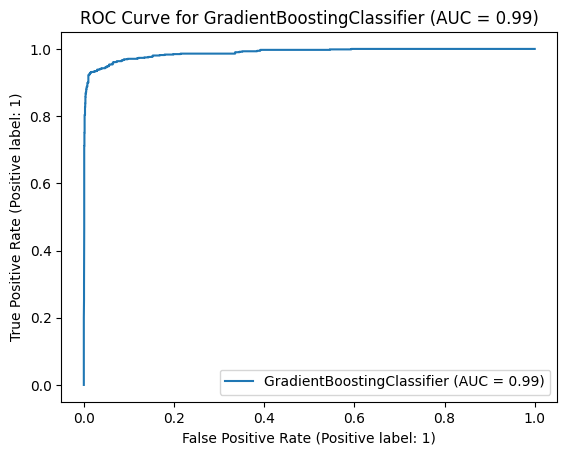

In [ ]:

from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Calculate ROC-AUC for each model
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()]
for model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Create a display object for plotting the ROC curve
    display = RocCurveDisplay.from_estimator(model, X_test, y_test)
    display.plot()  # Plot the ROC curve
    plt.title(f'ROC Curve for {model.__class__.__name__} (AUC = {roc_auc:.2f})')
    plt.show()


The RFC model is the best based on the ROC curve

Retention Strategies

In [ ]:
# Using best model (replace 'best_model' with the chosen model):
y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# Define thresholds for risk zones:
green_threshold = 0.2
yellow_threshold = 0.6
orange_threshold = 0.9

# Categorize employees based on probability scores:
if (y_pred_proba < green_threshold).any():
    print("Safe Zone (Green): no policy change and intervention. Keep boosting morale and reviewing.")

elif ((y_pred_proba >= green_threshold) & (y_pred_proba < yellow_threshold)).any():
    print("Low Risk Zone (Yellow): Investigate dissatisfaction causes. One on One discussion.")

elif ((y_pred_proba >= yellow_threshold) & (y_pred_proba < orange_threshold)).any():
    print("Medium Risk Zone (Orange): Initiate  action to retain . Focus on excess workload. Address specific concerns, offer interesting projects, foriegn trips.")

elif (y_pred_proba >= orange_threshold).any():
    print("High Risk Zone (Red): Take urgent action. Work with the employee to resolve issues, and offer attractive incentives to stay, overseas placement.")

# Suggest retention strategies:



Safe Zone (Green): Minimal intervention necessary. Continue regular performance reviews.
